In [39]:
#  Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

**Reading and Understanding Data**

In [40]:
# Importing dataset
data = pd.read_csv('housing_coursework_entire_dataset_23-24.csv')

In [41]:
# Displaying the first few 5 rows of dataset
data.head()

,No.,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,1,-122.12,37.70,17,2488,617.0,1287,538,2.9922,179900,NEAR BAY
1,2,-122.21,38.10,36,3018,557.0,1445,556,3.8029,129900,NEAR BAY
2,3,-122.22,38.11,43,1939,353.0,968,392,3.1848,112700,NEAR BAY
3,4,-122.20,37.78,52,2300,443.0,1225,423,3.5398,158400,NEAR BAY
4,5,-122.19,37.79,50,954,217.0,546,201,2.6667,172800,NEAR BAY


In [42]:
# Checking shape of dataset
data.shape

(1000, 11)

In [43]:
# Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 1000 non-null   int64  
 1   longitude           1000 non-null   float64
 2   latitude            1000 non-null   float64
 3   housing_median_age  1000 non-null   int64  
 4   total_rooms         1000 non-null   int64  
 5   total_bedrooms      991 non-null    float64
 6   population          1000 non-null   int64  
 7   households          1000 non-null   int64  
 8   median_income       1000 non-null   float64
 9   median_house_value  1000 non-null   int64  
 10  ocean_proximity     998 non-null    object 
dtypes: float64(4), int64(6), object(1)
memory usage: 86.1+ KB


**Data Preprocessing**

In [44]:
# Finding missing values
data.isnull().sum()

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        9
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       2
dtype: int64

total_bedrooms has 9 missing values and ocean_proximity has 2 missing values

In [45]:
# Handling missing values in ocean_proximity as it is a categorical feature
mode_value = data['ocean_proximity'].mode()[0]  # Calculate the mode
data['ocean_proximity'] = data['ocean_proximity'].replace('0', pd.NA).fillna(mode_value)

In [46]:
# Handling missing values in total_bedrooms
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [47]:
data.isnull().sum()

No.                   0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [48]:
# Finding duplicate values
data.duplicated().sum()

0

In [49]:
# Dropping 'No' Column
data = data.drop(columns=['No.'])

In [50]:
# ocean_proximity is a categorical feature
# Finding value counts of ocean_proximity
data['ocean_proximity'].value_counts()

<1H OCEAN     458
INLAND        336
NEAR OCEAN    115
NEAR BAY       91
Name: ocean_proximity, dtype: int64

[]

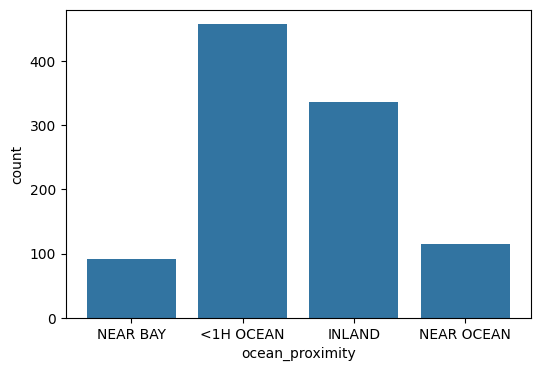

In [51]:
# Plotting ocean_proximity
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='ocean_proximity')
plt.plot()

In [52]:
# Encoding ocean_proximity
ocean_proximity = {a:b for b,a in enumerate(data['ocean_proximity'].unique())}
data.replace(ocean_proximity, inplace=True)

In [53]:
data.ocean_proximity.unique()

array([0, 1, 2, 3])

<Axes: >

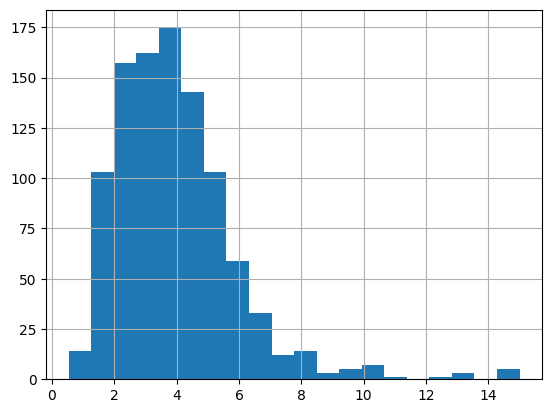

In [54]:
# Analyzing median_income as it is an important feature
data["median_income"].hist(bins=20)

<Axes: ylabel='median_house_value'>

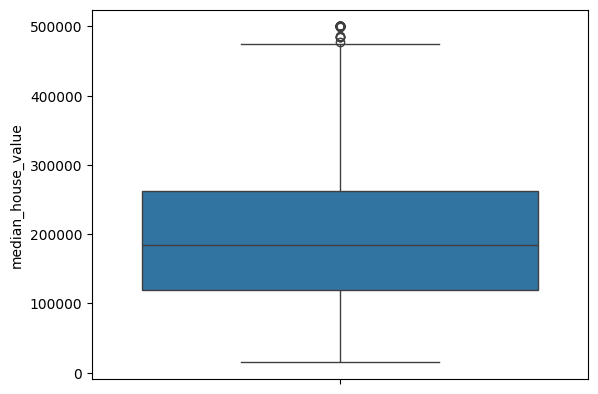

In [55]:
# Outliers
sns.boxplot(data['median_house_value'])

In [56]:
column = data['median_house_value']

# Calculate quartiles and IQR
Q1 = np.percentile(column, 25)
Q3 = np.percentile(column, 75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = column[(column < lower_bound) | (column > upper_bound)]
print("Outliers:")
print(outliers)

Outliers:
73     500001
208    500001
209    500001
214    500001
231    500001
232    486400
233    485000
266    500001
322    500001
323    500001
330    500001
338    500001
339    500001
394    500001
418    500001
419    500001
429    500001
430    500001
431    500001
433    500001
434    500001
435    500001
437    500001
468    500001
488    500000
533    500001
542    500001
543    477100
714    500001
754    500001
773    500001
774    500001
775    500001
776    500001
789    500001
791    500001
821    500001
822    500001
825    500001
827    500001
828    500001
834    500001
867    498800
868    485300
875    500001
878    500001
879    500001
882    500001
884    485000
891    500001
976    500001
988    500001
Name: median_house_value, dtype: int64


In [57]:
data[data['median_house_value']>480000]['median_house_value'].value_counts().head()

500001    45
485000     2
486400     1
500000     1
498800     1
Name: median_house_value, dtype: int64

In [58]:
data=data.loc[data['median_house_value']<500001,:]

<Figure size 600x400 with 0 Axes>

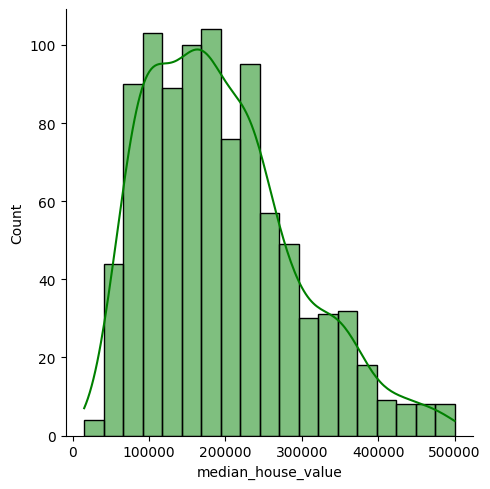

In [59]:
# Plotting median_house_value
plt.figure(figsize=(6,4))
sns.displot(data['median_house_value'],color='green',kde=True)
plt.show()

**Outliers greater than 50000 have been removed**

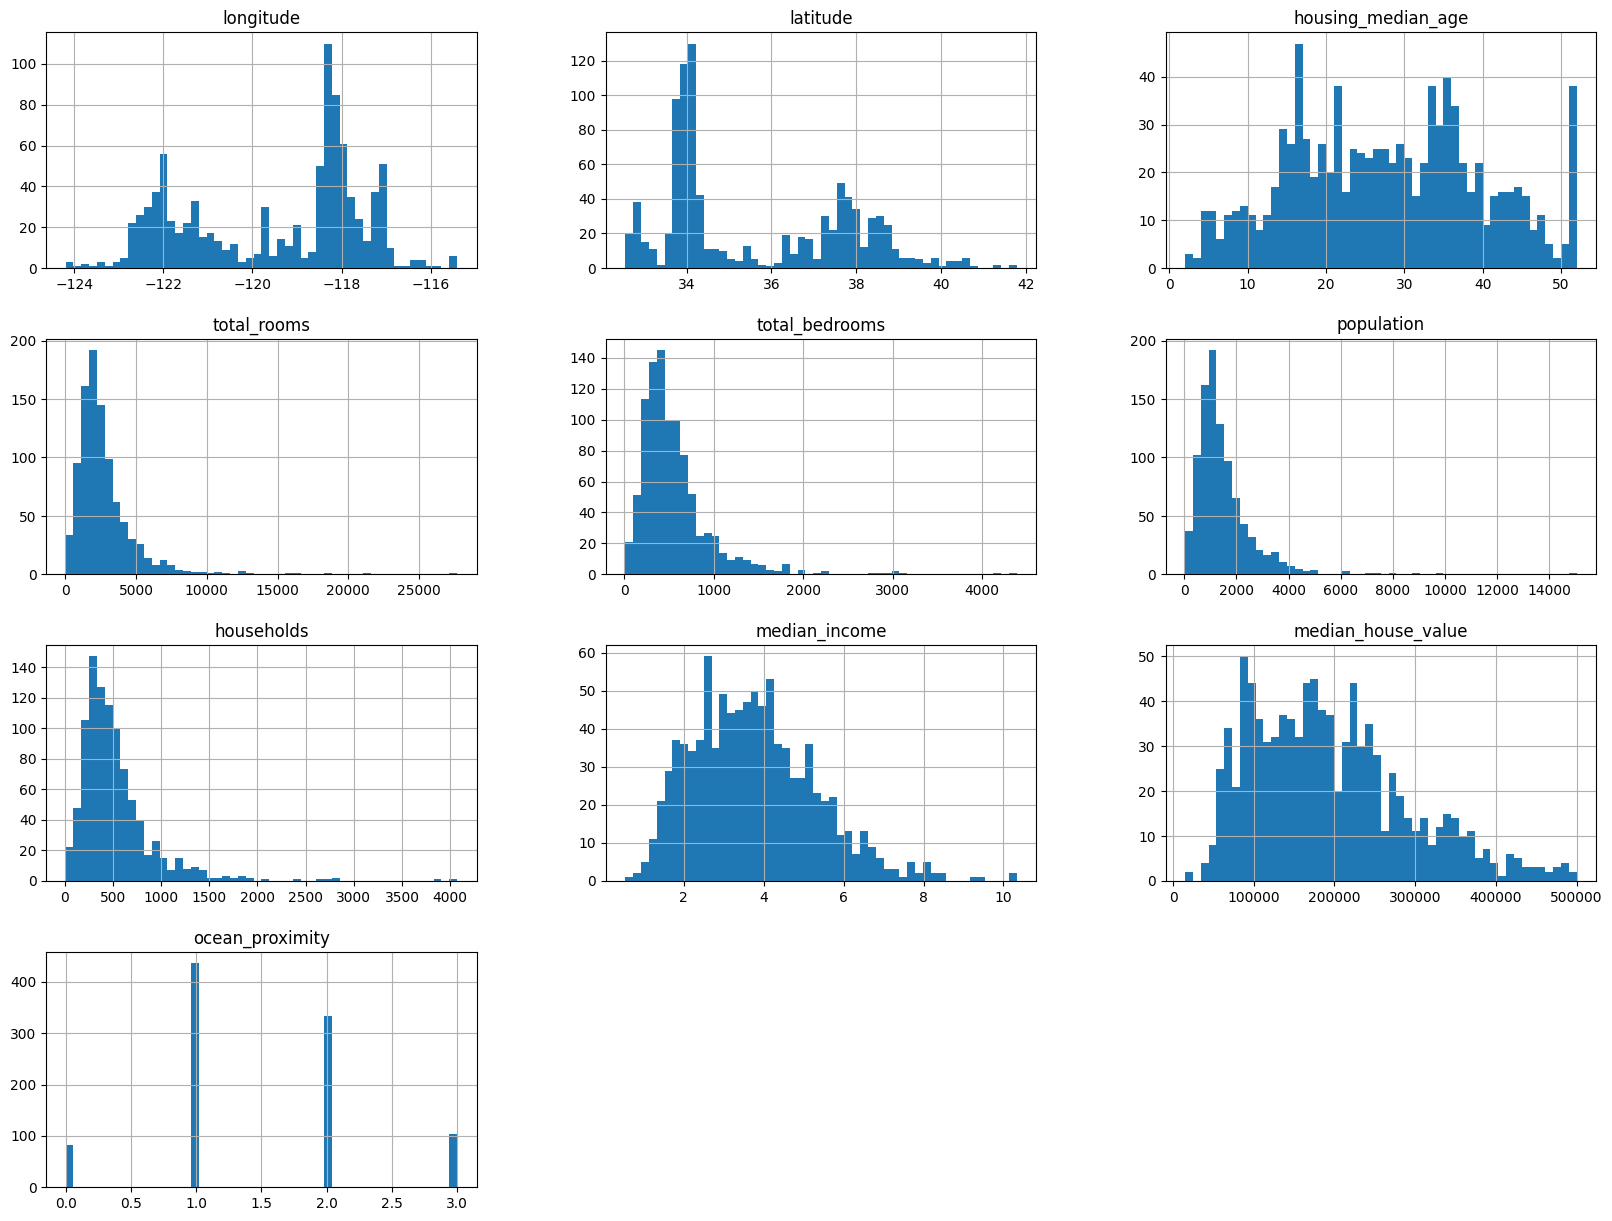

In [60]:
# Plotting histogram
data.hist(bins=50, figsize=(20, 15))
plt.show()

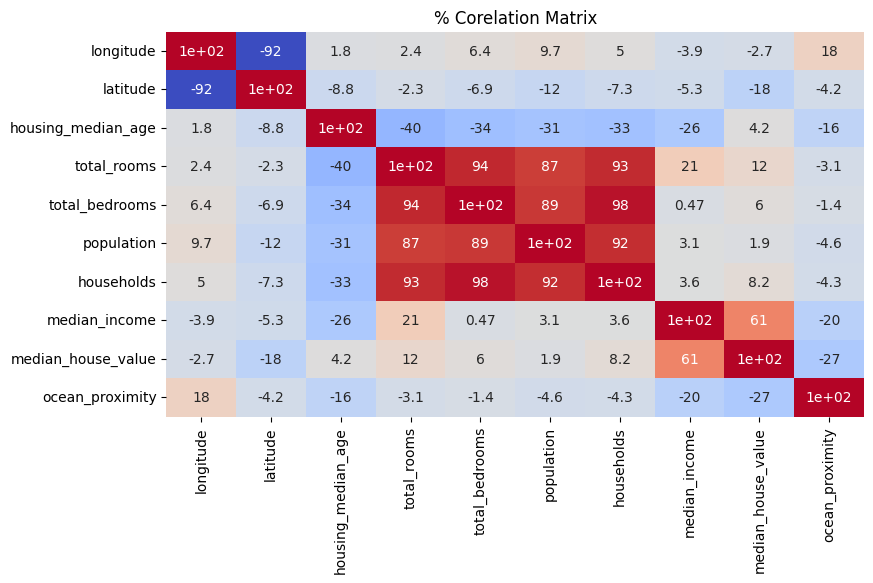

In [61]:
# Corelation Matrix
plt.figure(figsize=(9,5))
sns.heatmap(cbar=False,annot=True,data=data.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

**Modeling and Evaluation**
*   Baseline Model, strategy = "mean"
*   Baseline Model, strategy = "median"
*   Linear Regression
*   Random Forest Regressor
*   Catboost Regressor





In [62]:
# Split the data into features and target
X = data.drop('median_house_value',axis=1)
y = data['median_house_value']

In [63]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Baseline Model, strategy = "mean"

In [64]:
# 1st base-line model predicting the mean of the target variable
baseline_model_1 = DummyRegressor(strategy='mean')
baseline_model_1.fit(X_train, y_train)

# Make predictions using the baseline model
y_pred = baseline_model_1.predict(X_test)

# Evaluating the classifier
mean_absolute_error_baseline_1 = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mean_absolute_error_baseline_1)



Mean Absolute Error: 78369.68390395


Baseline Model, strategy = "median"

In [65]:
# 2nd base-line model predicting the median of the target variable
baseline_model_2 = DummyRegressor(strategy='median')
baseline_model_2.fit(X_train, y_train)

# Make predictions using the baseline model
y_pred = baseline_model_2.predict(X_test)

# Evaluating the classifier
mean_absolute_error_baseline_2 = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mean_absolute_error_baseline_2)

Mean Absolute Error: 77273.56020942409


Linear Regression

In [66]:
# Create a Linear Regression model
linear_regression_model = LinearRegression()

# Fit the model to the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regression_model.predict(X_test)

# Evaluating the linear regression model
mean_absolute_error_lr = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error (Linear Regression):", mean_absolute_error_lr)

Mean Absolute Error (Linear Regression): 46564.14701314213


Random Forest Regressor

In [67]:
# Create a Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the Random Forest Regression model
mean_absolute_error_rf = mean_absolute_error(y_test, y_pred_rf)

print("Mean Absolute Error (Random Forest Regression):", mean_absolute_error_rf)



Mean Absolute Error (Random Forest Regression): 42278.01429319372


In [68]:
!pip install catboost

Catboost Regressor

In [69]:
from catboost import CatBoostRegressor
# Create a CatBoost Regression model
catboost_model = CatBoostRegressor()

# Fit the model to the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_model.predict(X_test)

# Evaluating the CatBoost Regression model
mean_absolute_error_catboost = mean_absolute_error(y_test, y_pred_catboost)

print("Mean Absolute Error (CatBoost Regression):", mean_absolute_error_catboost)


Learning rate set to 0.039238
0:	learn: 94452.2204600	total: 3.01ms	remaining: 3.01s
1:	learn: 93037.7410356	total: 4.74ms	remaining: 2.37s
2:	learn: 91683.1441347	total: 7.48ms	remaining: 2.49s
3:	learn: 90318.4800881	total: 9.87ms	remaining: 2.46s
4:	learn: 89073.9391938	total: 11.1ms	remaining: 2.21s
5:	learn: 87820.6359772	total: 15ms	remaining: 2.49s
6:	learn: 86872.2684628	total: 17.1ms	remaining: 2.43s
7:	learn: 85743.7099482	total: 19.5ms	remaining: 2.42s
8:	learn: 84678.1886144	total: 22.9ms	remaining: 2.52s
9:	learn: 83635.4703847	total: 26.9ms	remaining: 2.66s
10:	learn: 82520.7057281	total: 29.5ms	remaining: 2.65s
11:	learn: 81509.8483280	total: 32.7ms	remaining: 2.69s
12:	learn: 80647.8797562	total: 35.4ms	remaining: 2.69s
13:	learn: 79787.6950604	total: 38ms	remaining: 2.68s
14:	learn: 78872.8604941	total: 41.5ms	remaining: 2.72s
15:	learn: 78154.2104778	total: 44.5ms	remaining: 2.74s
16:	learn: 77335.0084269	total: 46.8ms	remaining: 2.71s
17:	learn: 76717.6834403	total: 

**Hyperparameter Tuning**

Hyperparameter Tuning of Linear Regression Model

In [70]:
# Define the parameter grid for tuning
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 3, 4, 5]  # Adjust the number of jobs as per your system's capabilities
}


# Perform RandomizedSearchCV
linear_random_search = RandomizedSearchCV(estimator=linear_regression_model,
                                         param_distributions=param_grid,
                                         n_iter=20,
                                         cv=5,
                                         scoring='r2',
                                         verbose=0,
                                         random_state=42,
                                         n_jobs=-1)
linear_random_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = linear_random_search.best_params_
best_estimator = linear_random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_lr_tuned = best_estimator.predict(X_test)

# Evaluate the tuned Linear Regression model
mean_absolute_error_lr_tuned = mean_absolute_error(y_test, y_pred_lr_tuned)

print("Best Hyperparameters:", best_params)
print("Mean Absolute Error (Tuned Linear Regression):", mean_absolute_error_lr_tuned)



Best Hyperparameters: {'positive': False, 'n_jobs': None, 'fit_intercept': True, 'copy_X': False}
Mean Absolute Error (Tuned Linear Regression): 46564.14701314213


Hyperparameter Tuning of Random Forest Regressor

In [71]:
# Number of trees in the random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 300, num = 6)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 13, 16]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = random_forest_model,
                               param_distributions = random_grid,
                               n_iter = 20,
                               cv = 5,
                               verbose=0,
                               random_state=42,
                               n_jobs = -1)

rf_random.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = rf_random.best_params_
best_estimator = rf_random.best_estimator_

# Make predictions on the test data using the best model
y_pred_rf_tuned = best_estimator.predict(X_test)

# Evaluate the tuned Gradient Boosting Regression model
mean_absolute_error_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)

print("Best Hyperparameters:", best_params)
print("Mean Mean Absolute Error (Tuned Random Forest Regression):", mean_absolute_error_rf_tuned)





Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True}
Mean Mean Absolute Error (Tuned Random Forest Regression): 42509.55891797558


Hyperparameter Tuning of CatBoost Regressor

In [72]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 150, num = 2)]

max_depth = [int(x) for x in np.linspace(2, 120, num = 2)]

max_depth.append(None)

grid = {'n_estimators': n_estimators, 'learning_rate' : np.linspace(0,0.3,5)}
# Perform RandomizedSearchCV
catboost_random_search = RandomizedSearchCV(estimator=catboost_model,
                                            param_distributions=grid,
                                            n_iter=20,
                                            cv=5,
                                            scoring='neg_mean_absolute_error',
                                            verbose=2,
                                            random_state=42,
                                            n_jobs=-1,
                                            return_train_score=True)

catboost_random_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = catboost_random_search.best_params_
best_estimator = catboost_random_search.best_estimator_

# Make predictions on the test data using the best model
y_pred_catboost_tuned = best_estimator.predict(X_test)

# Evaluate the tuned CatBoost Regression model
mean_absolute_error_catboost_tuned = mean_absolute_error(y_test, y_pred_catboost_tuned)

print("Best Hyperparameters:", best_params)
print("Mean Absolute Error (Tuned CatBoost Regression):", mean_absolute_error_catboost_tuned)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 10 is smaller than n_iter=20. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5807, in

0:	learn: 90641.1987366	total: 2.44ms	remaining: 364ms
1:	learn: 86055.8040124	total: 3.64ms	remaining: 270ms
2:	learn: 81917.0309003	total: 5.79ms	remaining: 284ms
3:	learn: 78417.0508000	total: 7.65ms	remaining: 279ms
4:	learn: 75781.3351098	total: 9.53ms	remaining: 276ms
5:	learn: 73008.8287135	total: 11.4ms	remaining: 274ms
6:	learn: 70988.9319139	total: 12.6ms	remaining: 257ms
7:	learn: 69320.4906987	total: 15.3ms	remaining: 272ms
8:	learn: 67735.4771899	total: 19.4ms	remaining: 303ms
9:	learn: 66448.6397470	total: 23.3ms	remaining: 326ms
10:	learn: 65289.4426582	total: 28.8ms	remaining: 365ms
11:	learn: 63968.4908195	total: 34.2ms	remaining: 394ms
12:	learn: 62852.5849955	total: 37.1ms	remaining: 391ms
13:	learn: 62064.4355593	total: 39.3ms	remaining: 382ms
14:	learn: 61219.2836032	total: 41.4ms	remaining: 373ms
15:	learn: 60229.0138953	total: 43.6ms	remaining: 365ms
16:	learn: 59099.8885455	total: 45.8ms	remaining: 358ms
17:	learn: 58400.7081088	total: 47.8ms	remaining: 351ms
18

**Plotting Evaluation Metrics**

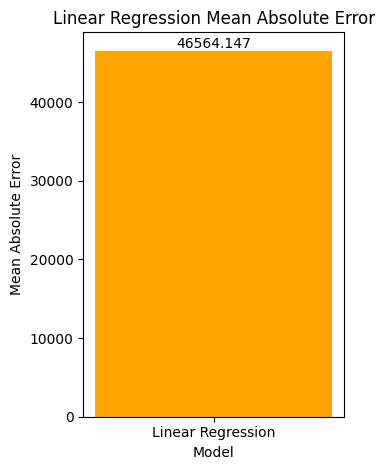

In [73]:
# Plot Mean Absolute Error
plt.subplot(1, 2, 2)
plt.bar("Linear Regression", mean_absolute_error_lr_tuned, color='orange')  # Only plotting tuned model
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Linear Regression Mean Absolute Error')

# Add MAE value on top of the bar
plt.text(0, mean_absolute_error_lr_tuned, round(mean_absolute_error_lr_tuned, 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()

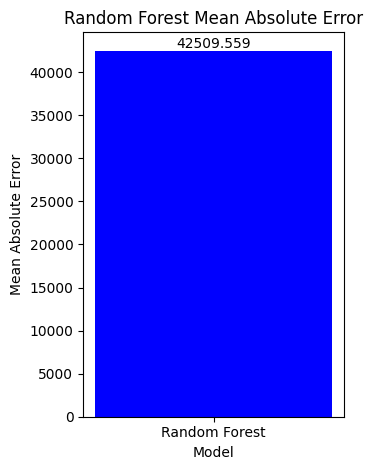

In [74]:
# Plot Mean Absolute Error
plt.subplot(1, 2, 2)
plt.bar("Random Forest", mean_absolute_error_rf_tuned, color='blue')  # Only plotting tuned model
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('Random Forest Mean Absolute Error')

# Add MAE value on top of the bar
plt.text(0, mean_absolute_error_rf_tuned, round(mean_absolute_error_rf_tuned, 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()

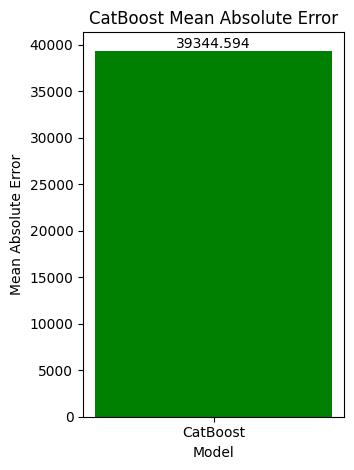

In [75]:
# Plot Mean Absolute Error
plt.subplot(1, 2, 2)
plt.bar("CatBoost", mean_absolute_error_catboost_tuned, color='green')  # Only plotting tuned model
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.title('CatBoost Mean Absolute Error')

# Add MAE value on top of the bar
plt.text(0, mean_absolute_error_catboost_tuned, round(mean_absolute_error_catboost_tuned, 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()

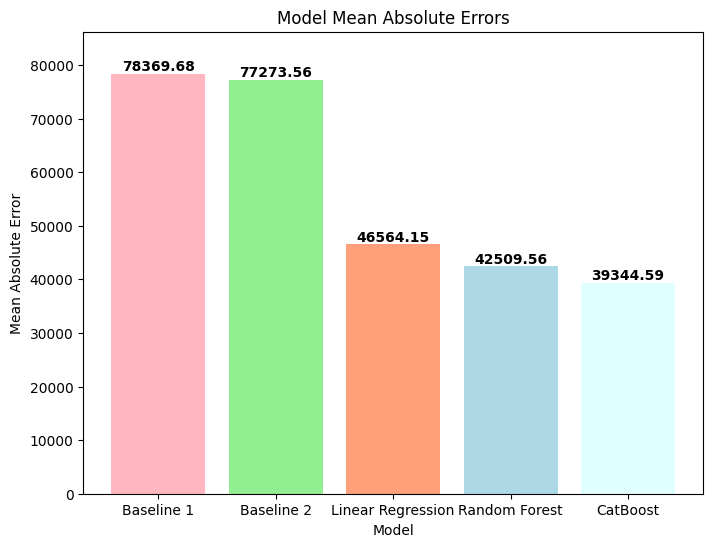

In [76]:
mean_absolute_errors = [mean_absolute_error_baseline_1, mean_absolute_error_baseline_2, mean_absolute_error_lr_tuned, mean_absolute_error_rf_tuned, mean_absolute_error_catboost_tuned]
models = ['Baseline 1', 'Baseline 2', 'Linear Regression', 'Random Forest', 'CatBoost']

# Plotting the mean absolute errors
plt.figure(figsize=(8, 6))
bars = plt.bar(models, mean_absolute_errors, color=['lightpink', 'lightgreen', 'lightsalmon', 'lightblue', 'lightcyan'])

# Adding text on top of the bars with the mean absolute error values
for bar, mae in zip(bars, mean_absolute_errors):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f'{mae:.2f}',
             ha='center', va='bottom', color='black', fontweight='bold')

plt.title('Model Mean Absolute Errors')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.ylim(0, max(mean_absolute_errors) * 1.1)  # Set the y-axis limit slightly above the maximum value
plt.show()
